# T shaped object mass and fric_coeff profile

In [2]:
import os
import sys
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

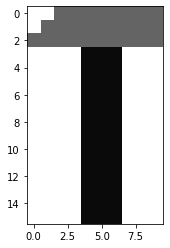

In [7]:
img = cv2.imread('fig/hammer.png')
plt.imshow(img)
mask = img[:,:,0] < 255

In [9]:
img = cv2.imread('fig/hammer_fric.png').astype('float')/255
bottom_fric_prof = np.stack([img[:,:,2][mask]/100, img[:,:,1][mask]], axis=-1)
print(bottom_fric_prof)

[[0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.00196078 0.09803922]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
